## Визуализация торгов за день
- по реальным записям из базы
- тестовые торговые алгоритмы

In [106]:
%reload_ext autoreload
%autoreload 2

In [107]:
import os
from dotenv import load_dotenv

load_dotenv()

TOKEN = os.getenv("INVEST_TOKEN")

TICKER = 'RNFT'
FIGI = 'BBG00F9XX7H4'

День: 2024-03-14, 'тестовый', Итог: 15.4, Записей: 13
{'profit': 15.4, 'profit_p': '0.02', 'profit_change_avg': 15.4, 'pot_profit': 13.5, 'pot_profit_p': 1.14, 'days': 1, 'success_days': 1, 'success_p': 1.0, 'sleep_trading': 60, 'max_shares': 5, 'base_shares': 5, 'threshold_buy_steps': 6, 'threshold_sell_steps': 0, 'step_size': 1.4, 'step_cnt': 2, 'operations_cnt': 13, 'operations_avg': 13.0}


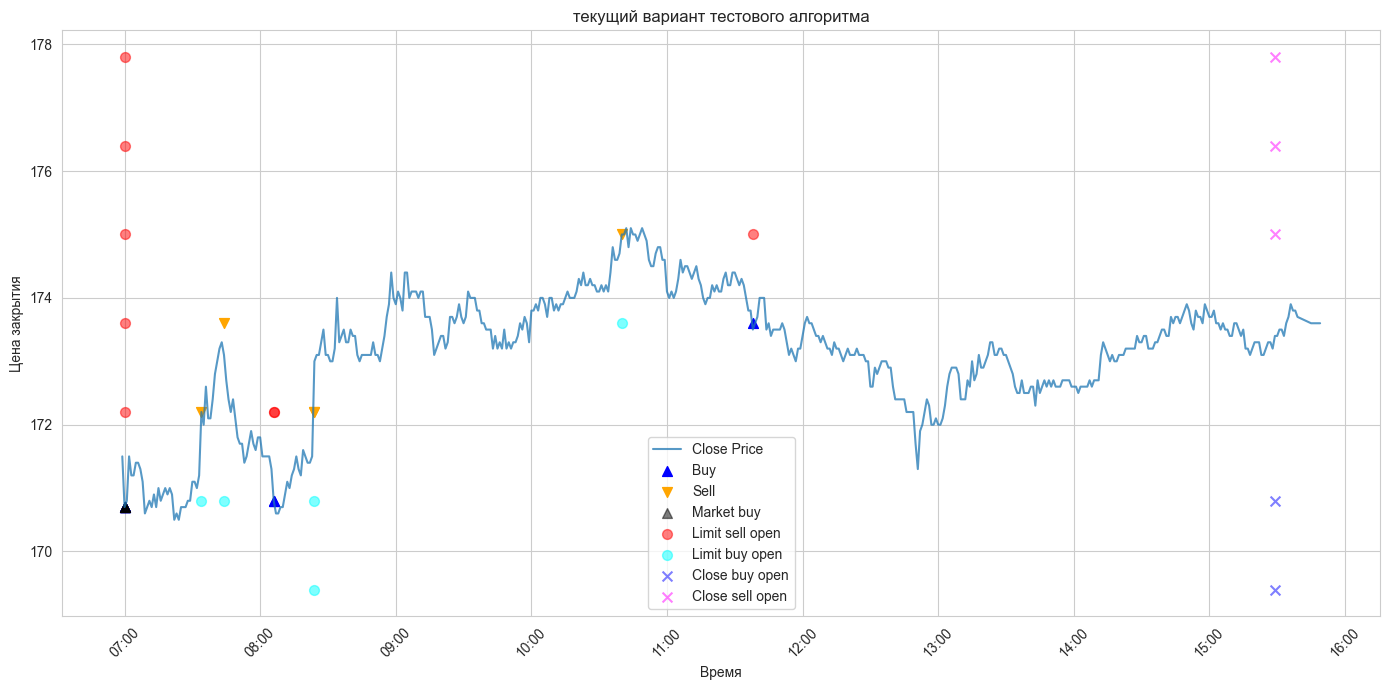

In [166]:
from trader_bot import ConfigDTO
from datetime import datetime
from lib.visaualize import Visualize
from lib.historical_candles import HistoricalCandles
from lib.historical_trade import HistoricalTrade
from test_env.test_alg import TestAlgorithm

historical_trade = HistoricalTrade()
data_handler = HistoricalCandles(TOKEN, FIGI, TICKER)

date = '2024-03-14'

# проблемные зоны - тут идет лютый спад и всё сливается
# date = '2023-08-04'
# date = '2023-05-02'
# date = '2023-08-25'
# date = '2023-09-07'
# date = '2023-09-11'
# date = '2023-09-19'

# тут резкий скачок и перестает идти торговля
# date = '2023-09-12'

# date = None

alg_name = '-' #'v5_t60'
# alg_name = None #'v5_t60'

viz = Visualize(data_handler)

def show_test_alg(date_):
    if date_ is None:
        date_ = datetime.now().strftime('%Y-%m-%d')
    
    test_alg = TestAlgorithm(TOKEN, TICKER, FIGI, do_printing=False)
    
    result = test_alg.test(
        last_test_date = date_,
        test_days_num = 1, # тут берем всегда только 1 день для этого файла
        shares_count=0,
    
        config=ConfigDTO(
            start_time='07:00',  # 10:45
            end_time='15:29',  # 18:15
        
            max_shares=5,
            base_shares=5,
            step_size=1.4,
            step_cnt=2,
            threshold_buy_steps=6,
            threshold_sell_steps=0,
            
            sleep_trading=1 * 60,
        ),
    )
    
    print(f"День: {date_}, 'тестовый', Итог: {result['profit']}, Записей: {result['operations_cnt']}")
    print(result)
    
    viz.draw(
        date_, 
        test_alg.accounting_helper.get_deals(),
        test_alg.accounting_helper.get_orders(),
        'текущий вариант тестового алгоритма'
    )

results = historical_trade.get_daily_totals(date, alg_name)

for obj in results:
    print(f"День: {obj.date}, {obj.alg_name}, "
          f"{'Итог' if obj.is_closed else 'Подытог'}: {obj.total}, "
          f"Записей: {obj.cnt}")
    viz.draw(
        obj.date, 
        historical_trade.get_deals(obj.date, obj.alg_name), 
        [],
        obj.alg_name
    )

show_test_alg(date)